In [1]:
!pip install pandas

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('telcom_data1.csv')

In [4]:
df

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311450e+19,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,1823652.0,2.082010e+14,3.366496e+10,3.552120e+13,9.16457E+15,...,15854611.0,2501332.00,8198936.00,9656251.00,278082303.0,1.434415e+07,171744450.0,8.814393e+06,36749741.0,308879636.0
1,1.311450e+19,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,1365104.0,2.082020e+14,3.368185e+10,3.579400e+13,L77566A,...,20247395.0,19111729.00,18338413.00,17227132.00,608750074.0,1.170709e+06,526904238.0,1.505514e+07,53800391.0,653384965.0
2,1.311450e+19,4/9/2019 17:42,1.0,4/25/2019 11:58,652.0,1361762.0,2.082000e+14,3.376063e+10,3.528150e+13,D42335A,...,19725661.0,14699576.00,17587794.00,6163408.00,229584621.0,3.956300e+05,410692588.0,4.215763e+06,27883638.0,279807335.0
3,1.311450e+19,4/10/2019 0:31,486.0,4/25/2019 7:36,171.0,1321509.0,2.082010e+14,3.375034e+10,3.535660e+13,T21824A,...,21388122.0,15146643.00,13994646.00,1097942.00,799538153.0,1.084972e+07,749039933.0,1.279728e+07,43324218.0,846028530.0
4,1.311450e+19,4/12/2019 20:10,565.0,4/25/2019 10:40,954.0,1089009.0,2.082010e+14,3.369980e+10,3.540700e+13,D88865A,...,15259380.0,18962873.00,17124581.00,415218.00,527707248.0,3.529801e+06,550709500.0,1.391032e+07,38542814.0,569138589.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149996,7.277830e+18,4/29/2019 7:28,451.0,4/30/2019 6:02,214.0,81230.0,2.082020e+14,3.365069e+10,3.548310e+13,D20434A,...,16191667.0,11763428.00,17883703.00,19678161.00,526609673.0,9.197207e+06,3264510.0,1.348742e+07,57628851.0,574175259.0
149997,7.349880e+18,4/29/2019 7:28,483.0,4/30/2019 10:41,187.0,97970.0,2.082020e+14,3.366345e+10,3.566050e+13,D10223C,...,13877234.0,8288284.00,19350146.00,21293148.00,626893062.0,4.735033e+06,712180387.0,2.457758e+06,39135081.0,666648844.0
149998,1.311450e+19,4/29/2019 7:28,283.0,4/30/2019 10:46,810.0,98249.0,2.082020e+14,3.362189e+10,3.572120e+13,T51102A,...,22660510.0,1855903.00,9963942.00,5065760.00,553539484.0,1.339432e+07,121100856.0,1.131473e+07,34912224.0,592786405.0
149999,1.311450e+19,4/29/2019 7:28,696.0,4/30/2019 10:40,327.0,97910.0,2.082020e+14,3.361962e+10,8.618620e+13,L88342B,...,8817106.0,8305402.00,3322253.00,13172589.00,352536971.0,2.529475e+06,814713113.0,1.406930e+06,29626096.0,371895920.0


In [5]:
df.shape

(150001, 55)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 55 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   Bearer Id                                 149010 non-null  float64
 1   Start                                     150000 non-null  object 
 2   Start ms                                  150000 non-null  float64
 3   End                                       150000 non-null  object 
 4   End ms                                    150000 non-null  float64
 5   Dur. (ms)                                 150000 non-null  float64
 6   IMSI                                      149431 non-null  float64
 7   MSISDN/Number                             148935 non-null  float64
 8   IMEI                                      149429 non-null  float64
 9   Last Location Name                        148848 non-null  object 
 10  Avg RTT DL (ms)     

### Treat missing & outliers by replacing with the mean or the mode of the corresponding variable):

* Average TCP retransmission
* Average RTT
* Handset type
* Average throughput


In [7]:
# Average TCP retransmission:
df['Avg_TCP_Retransmission'] = (df['TCP DL Retrans. Vol (Bytes)'] + df['TCP UL Retrans. Vol (Bytes)']) / 2
df['Avg_TCP_Retransmission']

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
          ..
149996   NaN
149997   NaN
149998   NaN
149999   NaN
150000   NaN
Name: Avg_TCP_Retransmission, Length: 150001, dtype: float64

In [8]:
# Replace missing values with the mean:
df_filled = df.fillna(df.mean())

# Mean and standard deviation for outlier detection:
mean = df_filled['Avg_TCP_Retransmission'].mean()
std = df_filled['Avg_TCP_Retransmission'].std()

# Replace outliers with the mean:
df_filled['Avg_TCP_Retransmission'] = np.where(
    np.abs(df_filled['Avg_TCP_Retransmission'] - mean) > 3 * std,
    mean,
    df_filled['Avg_TCP_Retransmission']
)

print(df_filled['Avg_TCP_Retransmission'])

0         1.285848e+07
1         1.285848e+07
2         1.285848e+07
3         1.285848e+07
4         1.285848e+07
              ...     
149996    1.285848e+07
149997    1.285848e+07
149998    1.285848e+07
149999    1.285848e+07
150000    1.285848e+07
Name: Avg_TCP_Retransmission, Length: 150001, dtype: float64


In [9]:
# Average RTT:
df['Avg_RTT'] = (df['Avg RTT DL (ms)'] + df['Avg RTT UL (ms)']) / 2
df['Avg_RTT']

0         23.5
1         35.0
2          NaN
3          NaN
4          NaN
          ... 
149996    16.0
149997    14.5
149998    24.5
149999    21.0
150000     NaN
Name: Avg_RTT, Length: 150001, dtype: float64

In [10]:
# Replace missing values with the mean:
df_filled = df.fillna(df.mean())

# Mean and standard deviation for outlier detection:
mean = df_filled['Avg_RTT'].mean()
std = df_filled['Avg_RTT'].std()

# Replace outliers with the mean:
df_filled['Avg_RTT'] = np.where(
    np.abs(df_filled['Avg_RTT'] - mean) > 3 * std,
    mean,
    df_filled['Avg_RTT']
)

print(df_filled['Avg_RTT'])

0         23.500000
1         35.000000
2         63.512443
3         63.512443
4         63.512443
            ...    
149996    16.000000
149997    14.500000
149998    24.500000
149999    21.000000
150000    63.512443
Name: Avg_RTT, Length: 150001, dtype: float64


In [11]:
# Mode of 'Handset Type' for each 'MSISDN/Number':
handset_type_mode = df.groupby('MSISDN/Number')['Handset Type'].agg(lambda x: x.mode()[0])

# DataFrame with the mode values:
handset_type_df = pd.DataFrame({'MSISDN/Number': handset_type_mode.index, 'Handset Type': handset_type_mode.values})

handset_type_df

,MSISDN/Number,Handset Type
0,3.360100e+10,Huawei P20 Lite Huawei Nova 3E
1,3.360100e+10,Apple iPhone 7 (A1778)
2,3.360100e+10,undefined
3,3.360101e+10,Apple iPhone 5S (A1457)
4,3.360101e+10,Apple iPhone Se (A1723)
...,...,...
106851,3.379000e+10,Huawei Honor 9 Lite
106852,3.379000e+10,Apple iPhone 8 Plus (A1897)
106853,3.197020e+12,Quectel Wireless. Quectel Ec25-E
106854,3.370000e+14,Huawei B525S-23A


In [12]:
# Average throughput:
df['Avg_Throughput'] = (df['Avg Bearer TP DL (kbps)'] + df['Avg Bearer TP UL (kbps)']) / 2
df['Avg_Throughput']

0         33.5
1         21.0
2          7.5
3         44.0
4          7.5
          ... 
149996    58.5
149997    38.5
149998    45.0
149999    35.5
150000     NaN
Name: Avg_Throughput, Length: 150001, dtype: float64

In [13]:
# Replace missing values with the mean:
df_filled = df.fillna(df.mean())

# Mean and standard deviation for outlier detection:
mean = df_filled['Avg_Throughput'].mean()
std = df_filled['Avg_Throughput'].std()

# Replace outliers with the mean
df_filled['Avg_Throughput'] = np.where(
    np.abs(df_filled['Avg_Throughput'] - mean) > 3 * std,
    mean,
    df_filled['Avg_Throughput']
)

print(df_filled['Avg_Throughput'])

0           33.500000
1           21.000000
2            7.500000
3           44.000000
4            7.500000
             ...     
149996      58.500000
149997      38.500000
149998      45.000000
149999      35.500000
150000    7535.237287
Name: Avg_Throughput, Length: 150001, dtype: float64


In [14]:
df

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes),Avg_TCP_Retransmission,Avg_RTT,Avg_Throughput
0,1.311450e+19,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,1823652.0,2.082010e+14,3.366496e+10,3.552120e+13,9.16457E+15,...,9656251.00,278082303.0,1.434415e+07,171744450.0,8.814393e+06,36749741.0,308879636.0,NaN,23.5,33.5
1,1.311450e+19,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,1365104.0,2.082020e+14,3.368185e+10,3.579400e+13,L77566A,...,17227132.00,608750074.0,1.170709e+06,526904238.0,1.505514e+07,53800391.0,653384965.0,NaN,35.0,21.0
2,1.311450e+19,4/9/2019 17:42,1.0,4/25/2019 11:58,652.0,1361762.0,2.082000e+14,3.376063e+10,3.528150e+13,D42335A,...,6163408.00,229584621.0,3.956300e+05,410692588.0,4.215763e+06,27883638.0,279807335.0,NaN,NaN,7.5
3,1.311450e+19,4/10/2019 0:31,486.0,4/25/2019 7:36,171.0,1321509.0,2.082010e+14,3.375034e+10,3.535660e+13,T21824A,...,1097942.00,799538153.0,1.084972e+07,749039933.0,1.279728e+07,43324218.0,846028530.0,NaN,NaN,44.0
4,1.311450e+19,4/12/2019 20:10,565.0,4/25/2019 10:40,954.0,1089009.0,2.082010e+14,3.369980e+10,3.540700e+13,D88865A,...,415218.00,527707248.0,3.529801e+06,550709500.0,1.391032e+07,38542814.0,569138589.0,NaN,NaN,7.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149996,7.277830e+18,4/29/2019 7:28,451.0,4/30/2019 6:02,214.0,81230.0,2.082020e+14,3.365069e+10,3.548310e+13,D20434A,...,19678161.00,526609673.0,9.197207e+06,3264510.0,1.348742e+07,57628851.0,574175259.0,NaN,16.0,58.5
149997,7.349880e+18,4/29/2019 7:28,483.0,4/30/2019 10:41,187.0,97970.0,2.082020e+14,3.366345e+10,3.566050e+13,D10223C,...,21293148.00,626893062.0,4.735033e+06,712180387.0,2.457758e+06,39135081.0,666648844.0,NaN,14.5,38.5
149998,1.311450e+19,4/29/2019 7:28,283.0,4/30/2019 10:46,810.0,98249.0,2.082020e+14,3.362189e+10,3.572120e+13,T51102A,...,5065760.00,553539484.0,1.339432e+07,121100856.0,1.131473e+07,34912224.0,592786405.0,NaN,24.5,45.0
149999,1.311450e+19,4/29/2019 7:28,696.0,4/30/2019 10:40,327.0,97910.0,2.082020e+14,3.361962e+10,8.618620e+13,L88342B,...,13172589.00,352536971.0,2.529475e+06,814713113.0,1.406930e+06,29626096.0,371895920.0,NaN,21.0,35.5


In [15]:
df.fillna(df[['Avg_TCP_Retransmission','Avg_RTT','Avg_Throughput' ]].mean(), inplace=True)

df

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes),Avg_TCP_Retransmission,Avg_RTT,Avg_Throughput
0,1.311450e+19,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,1823652.0,2.082010e+14,3.366496e+10,3.552120e+13,9.16457E+15,...,9656251.00,278082303.0,1.434415e+07,171744450.0,8.814393e+06,36749741.0,308879636.0,1.285848e+07,23.500000,33.500000
1,1.311450e+19,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,1365104.0,2.082020e+14,3.368185e+10,3.579400e+13,L77566A,...,17227132.00,608750074.0,1.170709e+06,526904238.0,1.505514e+07,53800391.0,653384965.0,1.285848e+07,35.000000,21.000000
2,1.311450e+19,4/9/2019 17:42,1.0,4/25/2019 11:58,652.0,1361762.0,2.082000e+14,3.376063e+10,3.528150e+13,D42335A,...,6163408.00,229584621.0,3.956300e+05,410692588.0,4.215763e+06,27883638.0,279807335.0,1.285848e+07,63.512443,7.500000
3,1.311450e+19,4/10/2019 0:31,486.0,4/25/2019 7:36,171.0,1321509.0,2.082010e+14,3.375034e+10,3.535660e+13,T21824A,...,1097942.00,799538153.0,1.084972e+07,749039933.0,1.279728e+07,43324218.0,846028530.0,1.285848e+07,63.512443,44.000000
4,1.311450e+19,4/12/2019 20:10,565.0,4/25/2019 10:40,954.0,1089009.0,2.082010e+14,3.369980e+10,3.540700e+13,D88865A,...,415218.00,527707248.0,3.529801e+06,550709500.0,1.391032e+07,38542814.0,569138589.0,1.285848e+07,63.512443,7.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149996,7.277830e+18,4/29/2019 7:28,451.0,4/30/2019 6:02,214.0,81230.0,2.082020e+14,3.365069e+10,3.548310e+13,D20434A,...,19678161.00,526609673.0,9.197207e+06,3264510.0,1.348742e+07,57628851.0,574175259.0,1.285848e+07,16.000000,58.500000
149997,7.349880e+18,4/29/2019 7:28,483.0,4/30/2019 10:41,187.0,97970.0,2.082020e+14,3.366345e+10,3.566050e+13,D10223C,...,21293148.00,626893062.0,4.735033e+06,712180387.0,2.457758e+06,39135081.0,666648844.0,1.285848e+07,14.500000,38.500000
149998,1.311450e+19,4/29/2019 7:28,283.0,4/30/2019 10:46,810.0,98249.0,2.082020e+14,3.362189e+10,3.572120e+13,T51102A,...,5065760.00,553539484.0,1.339432e+07,121100856.0,1.131473e+07,34912224.0,592786405.0,1.285848e+07,24.500000,45.000000
149999,1.311450e+19,4/29/2019 7:28,696.0,4/30/2019 10:40,327.0,97910.0,2.082020e+14,3.361962e+10,8.618620e+13,L88342B,...,13172589.00,352536971.0,2.529475e+06,814713113.0,1.406930e+06,29626096.0,371895920.0,1.285848e+07,21.000000,35.500000


In [16]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

# Select the relevant experience metrics for clustering
experience_metrics = df[['Avg_Throughput', 'Avg_RTT', 'Avg_TCP_Retransmission']]

# Perform scaling or normalization 
scaler = MinMaxScaler()
experience_metrics = pd.DataFrame(scaler.fit_transform(df[['Avg_TCP_Retransmission', 'Avg_RTT', 'Avg_Throughput']]), columns=['Avg_TCP_Retransmission', 'Avg_RTT', 'Avg_Throughput'], index=df.index)

# Apply k-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(experience_metrics)

# Get the cluster labels for each user
df['cluster'] = kmeans.labels_
df['cluster']

0         0
1         0
2         0
3         0
4         0
         ..
149996    0
149997    0
149998    0
149999    0
150000    0
Name: cluster, Length: 150001, dtype: int32

# Task 4.1 b

### Experience score for each user. Consider the experience score as the Euclidean distance between the user data point & the worst experience cluster.

In [17]:
from scipy.spatial import distance

# Centroid of each cluster:
cluster_centroids = df.groupby('cluster')[['Avg_TCP_Retransmission', 'Avg_RTT', 'Avg_Throughput']].mean()

# Determine the worst experience cluster:
worst_cluster = cluster_centroids.idxmax().values[0]

# Euclidean distance for each user data point:
df['Experience_score'] = df.apply(lambda row: distance.euclidean(row[['Avg_TCP_Retransmission', 'Avg_RTT', 'Avg_Throughput']], cluster_centroids.loc[worst_cluster]), axis=1)

# experience score for each user:
print(df[['MSISDN/Number', 'Experience_score']])

        MSISDN/Number  Experience_score
0        3.366496e+10      3.374237e+07
1        3.368185e+10      3.374237e+07
2        3.376063e+10      3.374237e+07
3        3.375034e+10      3.374237e+07
4        3.369980e+10      3.374237e+07
...               ...               ...
149996   3.365069e+10      3.374237e+07
149997   3.366345e+10      3.374237e+07
149998   3.362189e+10      3.374237e+07
149999   3.361962e+10      3.374237e+07
150000            NaN      3.374236e+07

[150001 rows x 2 columns]


In [18]:
df

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes),Avg_TCP_Retransmission,Avg_RTT,Avg_Throughput,cluster,Experience_score
0,1.311450e+19,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,1823652.0,2.082010e+14,3.366496e+10,3.552120e+13,9.16457E+15,...,1.434415e+07,171744450.0,8.814393e+06,36749741.0,308879636.0,1.285848e+07,23.500000,33.500000,0,3.374237e+07
1,1.311450e+19,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,1365104.0,2.082020e+14,3.368185e+10,3.579400e+13,L77566A,...,1.170709e+06,526904238.0,1.505514e+07,53800391.0,653384965.0,1.285848e+07,35.000000,21.000000,0,3.374237e+07
2,1.311450e+19,4/9/2019 17:42,1.0,4/25/2019 11:58,652.0,1361762.0,2.082000e+14,3.376063e+10,3.528150e+13,D42335A,...,3.956300e+05,410692588.0,4.215763e+06,27883638.0,279807335.0,1.285848e+07,63.512443,7.500000,0,3.374237e+07
3,1.311450e+19,4/10/2019 0:31,486.0,4/25/2019 7:36,171.0,1321509.0,2.082010e+14,3.375034e+10,3.535660e+13,T21824A,...,1.084972e+07,749039933.0,1.279728e+07,43324218.0,846028530.0,1.285848e+07,63.512443,44.000000,0,3.374237e+07
4,1.311450e+19,4/12/2019 20:10,565.0,4/25/2019 10:40,954.0,1089009.0,2.082010e+14,3.369980e+10,3.540700e+13,D88865A,...,3.529801e+06,550709500.0,1.391032e+07,38542814.0,569138589.0,1.285848e+07,63.512443,7.500000,0,3.374237e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149996,7.277830e+18,4/29/2019 7:28,451.0,4/30/2019 6:02,214.0,81230.0,2.082020e+14,3.365069e+10,3.548310e+13,D20434A,...,9.197207e+06,3264510.0,1.348742e+07,57628851.0,574175259.0,1.285848e+07,16.000000,58.500000,0,3.374237e+07
149997,7.349880e+18,4/29/2019 7:28,483.0,4/30/2019 10:41,187.0,97970.0,2.082020e+14,3.366345e+10,3.566050e+13,D10223C,...,4.735033e+06,712180387.0,2.457758e+06,39135081.0,666648844.0,1.285848e+07,14.500000,38.500000,0,3.374237e+07
149998,1.311450e+19,4/29/2019 7:28,283.0,4/30/2019 10:46,810.0,98249.0,2.082020e+14,3.362189e+10,3.572120e+13,T51102A,...,1.339432e+07,121100856.0,1.131473e+07,34912224.0,592786405.0,1.285848e+07,24.500000,45.000000,0,3.374237e+07
149999,1.311450e+19,4/29/2019 7:28,696.0,4/30/2019 10:40,327.0,97910.0,2.082020e+14,3.361962e+10,8.618620e+13,L88342B,...,2.529475e+06,814713113.0,1.406930e+06,29626096.0,371895920.0,1.285848e+07,21.000000,35.500000,0,3.374237e+07


# Task 4.1 a

### Engagement score to each user. Consider the engagement score as the Euclidean distance between the user data point & the less engaged cluster (use the first clustering for this) 

In [19]:
d={"Sessions frequency":df["Bearer Id"],
  "Dur_msec":df["Dur. (ms)"],
   "MSISDN/Number":df["MSISDN/Number"],
  "Activity Duration DL (ms)":df["Activity Duration DL (ms)"],
  "Activity Duration UL (ms)":df["Activity Duration UL (ms)"],
  "Social Media DL (Bytes)":df["Social Media DL (Bytes)"],
  "Social Media UL (Bytes)":df["Social Media UL (Bytes)"],
  "Google DL (Bytes)":df["Google DL (Bytes)"],
  "Google UL (Bytes)":df["Google UL (Bytes)"],
  "Email DL (Bytes)":df["Email DL (Bytes)"],
  "Email UL (Bytes)":df["Email UL (Bytes)"],
  "Youtube DL (Bytes)":df["Youtube DL (Bytes)"],
  "Youtube UL (Bytes)":df["Youtube UL (Bytes)"],
  "Netflix DL (Bytes)":df["Netflix DL (Bytes)"],
  "Netflix UL (Bytes)":df["Netflix UL (Bytes)"],
  "Gaming DL (Bytes)":df["Gaming DL (Bytes)"],
  "Gaming UL (Bytes)":df["Gaming UL (Bytes)"],
  "Other DL (Bytes)":df["Other DL (Bytes)"],
  "Other UL (Bytes)":df["Other UL (Bytes)"],
  "Total UL (Bytes)":df["Total UL (Bytes)"],
  "Total DL (Bytes)":df["Total DL (Bytes)"]}

In [20]:
data=pd.DataFrame(d)

In [21]:
data

,Sessions frequency,Dur_msec,MSISDN/Number,Activity Duration DL (ms),Activity Duration UL (ms),Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311450e+19,1823652.0,3.366496e+10,37624.0,38787.0,1545765.000,24420.00000,1634479.000,1271433.000,3563542.000,...,15854611.0,2501332.00,8198936.00,9656251.00,278082303.0,1.434415e+07,171744450.0,8.814393e+06,36749741.0,308879636.0
1,1.311450e+19,1365104.0,3.368185e+10,168.0,3560.0,1926113.000,7165.00000,3493924.000,920172.000,629046.000,...,20247395.0,19111729.00,18338413.00,17227132.00,608750074.0,1.170709e+06,526904238.0,1.505514e+07,53800391.0,653384965.0
2,1.311450e+19,1361762.0,3.376063e+10,0.0,0.0,1684053.000,42224.00000,8535055.000,1694064.000,2690151.000,...,19725661.0,14699576.00,17587794.00,6163408.00,229584621.0,3.956300e+05,410692588.0,4.215763e+06,27883638.0,279807335.0
3,1.311450e+19,1321509.0,3.375034e+10,3330.0,37882.0,644121.000,13372.00000,9023734.000,2788027.000,1439754.000,...,21388122.0,15146643.00,13994646.00,1097942.00,799538153.0,1.084972e+07,749039933.0,1.279728e+07,43324218.0,846028530.0
4,1.311450e+19,1089009.0,3.369980e+10,0.0,0.0,862600.000,50188.00000,6248284.000,1500559.000,1936496.000,...,15259380.0,18962873.00,17124581.00,415218.00,527707248.0,3.529801e+06,550709500.0,1.391032e+07,38542814.0,569138589.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149996,7.277830e+18,81230.0,3.365069e+10,42376.0,41915.0,3464974.000,52091.00000,9967603.000,2817311.000,57639.000,...,16191667.0,11763428.00,17883703.00,19678161.00,526609673.0,9.197207e+06,3264510.0,1.348742e+07,57628851.0,574175259.0
149997,7.349880e+18,97970.0,3.366345e+10,17264.0,16759.0,2344568.000,7613.00000,2229420.000,2185941.000,1954414.000,...,13877234.0,8288284.00,19350146.00,21293148.00,626893062.0,4.735033e+06,712180387.0,2.457758e+06,39135081.0,666648844.0
149998,1.311450e+19,98249.0,3.362189e+10,25003.0,28640.0,1245845.000,14394.00000,3850890.000,2734579.000,1525734.000,...,22660510.0,1855903.00,9963942.00,5065760.00,553539484.0,1.339432e+07,121100856.0,1.131473e+07,34912224.0,592786405.0
149999,1.311450e+19,97910.0,3.361962e+10,13405.0,34088.0,801547.000,21562.00000,4189773.000,3567494.000,2228270.000,...,8817106.0,8305402.00,3322253.00,13172589.00,352536971.0,2.529475e+06,814713113.0,1.406930e+06,29626096.0,371895920.0


In [22]:
# Calculate Engagement metrics: Sessions frequency, Total data usage and Session duration:

data['Sessions frequency '] = data['Sessions frequency'] 
data['Total Data Usage'] = data['Total UL (Bytes)'] + data['Total DL (Bytes)']
data['Session Duration'] = data['Dur_msec']

# Aggregate the above metrics per customer id (MSISDN):
grouped_data = data.groupby('MSISDN/Number').agg({
    'Sessions frequency':'sum',
    'Total Data Usage': 'sum',
    'Session Duration': 'sum'
})

# Sort the customers based on the engagement metric in descending order:
sorted_data = grouped_data.sort_values(by='Total Data Usage', ascending=False)

# top 10 customers:
top_10_customers = sorted_data.head(10)

print(top_10_customers)      

               Sessions frequency  Total Data Usage  Session Duration
MSISDN/Number                                                        
3.361489e+10         1.241554e+20      8.846226e+09         9966898.0
3.376054e+10         1.963570e+20      8.514774e+09         9279434.0
3.362578e+10         2.217929e+20      8.499621e+09        18553754.0
3.362632e+10         1.315773e+20      7.971167e+09         8791927.0
3.367588e+10         1.960686e+20      7.891111e+09         4865947.0
3.365973e+10         2.088226e+20      7.705863e+09         4035428.0
3.366646e+10         8.027228e+19      7.308501e+09         4536757.0
3.376041e+10         1.567972e+20      7.132371e+09         5321667.0
3.366471e+10         8.012818e+19      6.872018e+09         2927785.0
3.369879e+10         8.034433e+19      6.540899e+09         5169128.0


In [23]:
from sklearn.preprocessing import MinMaxScaler

metrics_to_normalize = data[['Sessions frequency', 'Total Data Usage', 'Session Duration']]
scaler = MinMaxScaler()

norm_metrics = scaler.fit_transform(metrics_to_normalize)
normalized_metrics = pd.DataFrame(norm_metrics, columns=metrics_to_normalize.columns)

print(normalized_metrics)

        Sessions frequency  Total Data Usage  Session Duration
0                 0.988515          0.341600          0.980734
1                 0.988515          0.731616          0.733164
2                 0.988515          0.300676          0.731360
3                 0.988515          0.928123          0.709627
4                 0.988515          0.624280          0.584100
...                    ...               ...               ...
149996            0.057472          0.650301          0.040000
149997            0.068965          0.730105          0.049038
149998            0.988515          0.645873          0.049189
149999            0.988515          0.401893          0.049006
150000                 NaN               NaN               NaN

[150001 rows x 3 columns]


In [24]:
# Calculate the mean of each column:
column_means = normalized_metrics.mean()

# Fill the null values with the column means:
filled_normalized_metrics = normalized_metrics.fillna(column_means)

print(filled_normalized_metrics)

        Sessions frequency  Total Data Usage  Session Duration
0                 0.988515          0.341600          0.980734
1                 0.988515          0.731616          0.733164
2                 0.988515          0.300676          0.731360
3                 0.988515          0.928123          0.709627
4                 0.988515          0.624280          0.584100
...                    ...               ...               ...
149996            0.057472          0.650301          0.040000
149997            0.068965          0.730105          0.049038
149998            0.988515          0.645873          0.049189
149999            0.988515          0.401893          0.049006
150000            0.513854          0.503553          0.052622

[150001 rows x 3 columns]


In [25]:
#Import the neccesary scikit-learn library

import pandas as pd
from sklearn.cluster import KMeans               # KMeans used for clustering data into groups.
from sklearn.preprocessing import MinMaxScaler   # MinMaxScaler is used for scaling features.
from sklearn.impute import SimpleImputer         # SimpleInputer is used for handling missing values.

# Engagement metrics for clustering:
engagement_metrics = ['Sessions frequency', 'Total Data Usage', 'Session Duration']

# Handle missing values by imputing with the mean value:
imputer = SimpleImputer(strategy='mean')
data[engagement_metrics] = imputer.fit_transform(data[engagement_metrics])

# Normalize the engagement metrics using Min-Max scaling:
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data[engagement_metrics])

# Run k-means clustering (k=3):              
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(data_scaled)

# Add the cluster labels to the original data:
data['Cluster'] = kmeans.labels_

# Print the cluster assignments for each customer:
print(data[['MSISDN/Number', 'Cluster']])

        MSISDN/Number  Cluster
0        3.366496e+10        1
1        3.368185e+10        1
2        3.376063e+10        1
3        3.375034e+10        1
4        3.369980e+10        1
...               ...      ...
149996   3.365069e+10        2
149997   3.366345e+10        2
149998   3.362189e+10        1
149999   3.361962e+10        1
150000            NaN        1

[150001 rows x 2 columns]


In [26]:
# Consider the engagement score as the Euclidean distance between the user data point & the less engaged cluster (use the first clustering for this)

import pandas as pd
from scipy.spatial import distance
from sklearn.impute import SimpleImputer

# Assuming the first clustering results stored in a DataFrame called "cluster_centroids":
less_engaged_cluster = cluster_centroids.loc[0].values

# Select the engagement metrics for calculating engagement score:
engagement_metrics = ['Sessions frequency', 'Total Data Usage', 'Session Duration']

# Fill null values in engagement metrics with the mean value:
imputer = SimpleImputer(strategy='mean')
data[engagement_metrics] = imputer.fit_transform(data[engagement_metrics])

# Calculate the engagement score for each user:
data['Engagement Score'] = data.apply(lambda row: distance.euclidean(row[engagement_metrics].values, less_engaged_cluster), axis=1)

# Sort the data by engagement score in ascending order:
sorted_data = data.sort_values(by='Engagement Score')

# Print the users and their corresponding engagement scores:
print(sorted_data[['MSISDN/Number', 'Engagement Score']])

        MSISDN/Number  Engagement Score
75997    3.366067e+10      6.917540e+18
88428    3.365046e+10      6.917540e+18
6969     3.366329e+10      6.917540e+18
142385   3.363379e+10      6.917540e+18
69590    3.363041e+10      6.917540e+18
...               ...               ...
36409    3.369996e+10      1.318650e+19
19847    3.366603e+10      1.318650e+19
24249    3.365867e+10      1.318650e+19
15476    3.365075e+10      1.318650e+19
90892    3.366099e+10      1.318650e+19

[150001 rows x 2 columns]


The Euclidean distance is a commonly used distance metric in data analysis. 
It measures the straight-line distance between two points in a multi-dimensional space.
In this, it calculates the distance between each user's engagement metrics (represented as a point in a multi-dimensional space) and the centroid of the less engaged cluster. 
The Euclidean distance considers the differences in all dimensions (engagement metrics) and provides a measure of dissimilarity or distance between the user and the cluster centroid.

In [27]:
data

,Sessions frequency,Dur_msec,MSISDN/Number,Activity Duration DL (ms),Activity Duration UL (ms),Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),...,Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes),Sessions frequency,Total Data Usage,Session Duration,Cluster,Engagement Score
0,1.311450e+19,1823652.0,3.366496e+10,37624.0,38787.0,1545765.000,24420.00000,1634479.000,1271433.000,3563542.000,...,1.434415e+07,171744450.0,8.814393e+06,36749741.0,308879636.0,1.311450e+19,3.456294e+08,1.823652e+06,1,1.311450e+19
1,1.311450e+19,1365104.0,3.368185e+10,168.0,3560.0,1926113.000,7165.00000,3493924.000,920172.000,629046.000,...,1.170709e+06,526904238.0,1.505514e+07,53800391.0,653384965.0,1.311450e+19,7.071854e+08,1.365104e+06,1,1.311450e+19
2,1.311450e+19,1361762.0,3.376063e+10,0.0,0.0,1684053.000,42224.00000,8535055.000,1694064.000,2690151.000,...,3.956300e+05,410692588.0,4.215763e+06,27883638.0,279807335.0,1.311450e+19,3.076910e+08,1.361762e+06,1,1.311450e+19
3,1.311450e+19,1321509.0,3.375034e+10,3330.0,37882.0,644121.000,13372.00000,9023734.000,2788027.000,1439754.000,...,1.084972e+07,749039933.0,1.279728e+07,43324218.0,846028530.0,1.311450e+19,8.893527e+08,1.321509e+06,1,1.311450e+19
4,1.311450e+19,1089009.0,3.369980e+10,0.0,0.0,862600.000,50188.00000,6248284.000,1500559.000,1936496.000,...,3.529801e+06,550709500.0,1.391032e+07,38542814.0,569138589.0,1.311450e+19,6.076814e+08,1.089009e+06,1,1.311450e+19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149996,7.277830e+18,81230.0,3.365069e+10,42376.0,41915.0,3464974.000,52091.00000,9967603.000,2817311.000,57639.000,...,9.197207e+06,3264510.0,1.348742e+07,57628851.0,574175259.0,7.277830e+18,6.318041e+08,8.123000e+04,2,7.277830e+18
149997,7.349880e+18,97970.0,3.366345e+10,17264.0,16759.0,2344568.000,7613.00000,2229420.000,2185941.000,1954414.000,...,4.735033e+06,712180387.0,2.457758e+06,39135081.0,666648844.0,7.349880e+18,7.057839e+08,9.797000e+04,2,7.349880e+18
149998,1.311450e+19,98249.0,3.362189e+10,25003.0,28640.0,1245845.000,14394.00000,3850890.000,2734579.000,1525734.000,...,1.339432e+07,121100856.0,1.131473e+07,34912224.0,592786405.0,1.311450e+19,6.276986e+08,9.824900e+04,1,1.311450e+19
149999,1.311450e+19,97910.0,3.361962e+10,13405.0,34088.0,801547.000,21562.00000,4189773.000,3567494.000,2228270.000,...,2.529475e+06,814713113.0,1.406930e+06,29626096.0,371895920.0,1.311450e+19,4.015220e+08,9.791000e+04,1,1.311450e+19


In [28]:
df

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes),Avg_TCP_Retransmission,Avg_RTT,Avg_Throughput,cluster,Experience_score
0,1.311450e+19,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,1823652.0,2.082010e+14,3.366496e+10,3.552120e+13,9.16457E+15,...,1.434415e+07,171744450.0,8.814393e+06,36749741.0,308879636.0,1.285848e+07,23.500000,33.500000,0,3.374237e+07
1,1.311450e+19,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,1365104.0,2.082020e+14,3.368185e+10,3.579400e+13,L77566A,...,1.170709e+06,526904238.0,1.505514e+07,53800391.0,653384965.0,1.285848e+07,35.000000,21.000000,0,3.374237e+07
2,1.311450e+19,4/9/2019 17:42,1.0,4/25/2019 11:58,652.0,1361762.0,2.082000e+14,3.376063e+10,3.528150e+13,D42335A,...,3.956300e+05,410692588.0,4.215763e+06,27883638.0,279807335.0,1.285848e+07,63.512443,7.500000,0,3.374237e+07
3,1.311450e+19,4/10/2019 0:31,486.0,4/25/2019 7:36,171.0,1321509.0,2.082010e+14,3.375034e+10,3.535660e+13,T21824A,...,1.084972e+07,749039933.0,1.279728e+07,43324218.0,846028530.0,1.285848e+07,63.512443,44.000000,0,3.374237e+07
4,1.311450e+19,4/12/2019 20:10,565.0,4/25/2019 10:40,954.0,1089009.0,2.082010e+14,3.369980e+10,3.540700e+13,D88865A,...,3.529801e+06,550709500.0,1.391032e+07,38542814.0,569138589.0,1.285848e+07,63.512443,7.500000,0,3.374237e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149996,7.277830e+18,4/29/2019 7:28,451.0,4/30/2019 6:02,214.0,81230.0,2.082020e+14,3.365069e+10,3.548310e+13,D20434A,...,9.197207e+06,3264510.0,1.348742e+07,57628851.0,574175259.0,1.285848e+07,16.000000,58.500000,0,3.374237e+07
149997,7.349880e+18,4/29/2019 7:28,483.0,4/30/2019 10:41,187.0,97970.0,2.082020e+14,3.366345e+10,3.566050e+13,D10223C,...,4.735033e+06,712180387.0,2.457758e+06,39135081.0,666648844.0,1.285848e+07,14.500000,38.500000,0,3.374237e+07
149998,1.311450e+19,4/29/2019 7:28,283.0,4/30/2019 10:46,810.0,98249.0,2.082020e+14,3.362189e+10,3.572120e+13,T51102A,...,1.339432e+07,121100856.0,1.131473e+07,34912224.0,592786405.0,1.285848e+07,24.500000,45.000000,0,3.374237e+07
149999,1.311450e+19,4/29/2019 7:28,696.0,4/30/2019 10:40,327.0,97910.0,2.082020e+14,3.361962e+10,8.618620e+13,L88342B,...,2.529475e+06,814713113.0,1.406930e+06,29626096.0,371895920.0,1.285848e+07,21.000000,35.500000,0,3.374237e+07


# Task 4.2

### Consider the average of both engagement & experience scores as  the satisfaction score & report the top 10 satisfied customer 

In [29]:
Data = pd.DataFrame()
Data['MSISDN/Number'] = data['MSISDN/Number']
Data['Engagement Score'] = data['Engagement Score']
Data['Experience_score'] = df['Experience_score']

In [30]:
Data

,MSISDN/Number,Engagement Score,Experience_score
0,3.366496e+10,1.311450e+19,3.374237e+07
1,3.368185e+10,1.311450e+19,3.374237e+07
2,3.376063e+10,1.311450e+19,3.374237e+07
3,3.375034e+10,1.311450e+19,3.374237e+07
4,3.369980e+10,1.311450e+19,3.374237e+07
...,...,...,...
149996,3.365069e+10,7.277830e+18,3.374237e+07
149997,3.366345e+10,7.349880e+18,3.374237e+07
149998,3.362189e+10,1.311450e+19,3.374237e+07
149999,3.361962e+10,1.311450e+19,3.374237e+07


In [31]:
# Calculate the satisfaction score:
Data['Satisfaction Score'] = (Data['Engagement Score'] + Data['Experience_score']) / 2

sorted_df = Data.sort_values(by='Satisfaction Score', ascending=False)

# Top 10 satisfied customers:
top_10_satisfied_customers = sorted_df.head(10)

# Report the top 10 satisfied customers:
print(top_10_satisfied_customers[['MSISDN/Number', 'Satisfaction Score']])

        MSISDN/Number  Satisfaction Score
18654    3.366019e+10        6.593250e+18
76223    3.361530e+10        6.593250e+18
93867    3.361611e+10        6.593250e+18
97250    3.366602e+10        6.593250e+18
92172    3.361524e+10        6.593250e+18
4676     3.366725e+10        6.593250e+18
61439    3.365010e+10        6.593250e+18
8284     3.376240e+10        6.593250e+18
122023   3.365010e+10        6.593250e+18
86244    3.364243e+10        6.593250e+18


In [32]:
Data

,MSISDN/Number,Engagement Score,Experience_score,Satisfaction Score
0,3.366496e+10,1.311450e+19,3.374237e+07,6.557250e+18
1,3.368185e+10,1.311450e+19,3.374237e+07,6.557250e+18
2,3.376063e+10,1.311450e+19,3.374237e+07,6.557250e+18
3,3.375034e+10,1.311450e+19,3.374237e+07,6.557250e+18
4,3.369980e+10,1.311450e+19,3.374237e+07,6.557250e+18
...,...,...,...,...
149996,3.365069e+10,7.277830e+18,3.374237e+07,3.638915e+18
149997,3.366345e+10,7.349880e+18,3.374237e+07,3.674940e+18
149998,3.362189e+10,1.311450e+19,3.374237e+07,6.557250e+18
149999,3.361962e+10,1.311450e+19,3.374237e+07,6.557250e+18


# Task 4.3

### Build a linear regression model to predict the satisfaction score of a customer. 

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Prepare the data:
X = Data[['Engagement Score', 'Experience_score',]] 
y = Data['Satisfaction Score']  #target variable

# Split the data into train and test:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build a Linear regression model:
model = LinearRegression()

# Train the model:
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = model.score(X_test, y_test)

# Print evaluation metrics:
print('Mean Squared Error (MSE):', mse)
print('Root Mean Squared Error (RMSE):', rmse)
print('R-squared:', r2)

Mean Squared Error (MSE): 130567780848.48692
Root Mean Squared Error (RMSE): 361341.6400700131
R-squared: 1.0


#### The values provided for Mean Squared Error (MSE), Root Mean Squared Error (RMSE), and R-squared (R2) indicate a perfect fit between the regression model and the data.

#### An MSE of 130,567,780,848.49 and an RMSE of 361,341.64 imply that the average squared difference and the average difference between the predicted and actual values are both very low. This suggests that the model's predictions are extremely close to the actual values, indicating a high level of accuracy.

####  R2 value of 1.0 indicates that the model explains all the variability in the satisfaction score based on the predictor variables. This implies that the model fits the data perfectly, with no residual variability unaccounted for.

# Task 4.4

### Run a k-means (k=2) on the engagement & the experience score. 


In [34]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

X = Data[['Engagement Score', 'Experience_score']]

# Run k-means clustering with k=2:
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X)

# Assign the cluster labels to the data points:
Data['Cluster'] = kmeans.labels_

print(Data[['MSISDN/Number', 'Cluster']])

        MSISDN/Number  Cluster
0        3.366496e+10        0
1        3.368185e+10        0
2        3.376063e+10        0
3        3.375034e+10        0
4        3.369980e+10        0
...               ...      ...
149996   3.365069e+10        1
149997   3.366345e+10        1
149998   3.362189e+10        0
149999   3.361962e+10        0
150000            NaN        1

[150001 rows x 2 columns]


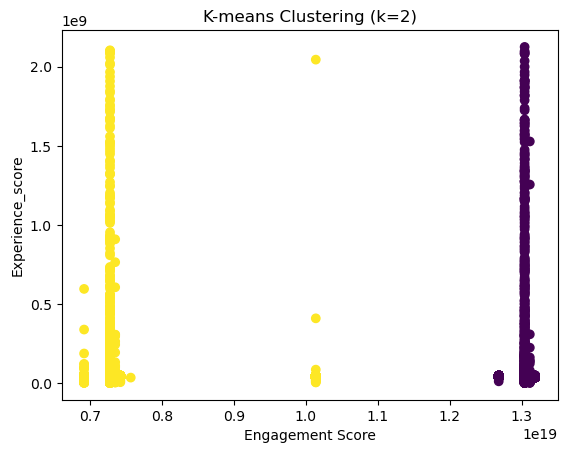

In [35]:
# Visualize the clusters
plt.scatter(Data['Engagement Score'], Data['Experience_score'], c=Data['Cluster'], cmap='viridis')
plt.xlabel('Engagement Score')
plt.ylabel('Experience_score')
plt.title('K-means Clustering (k=2)')
plt.show()

# Task 4.5

### Aggregate the average satisfaction & experience score per cluster. 


In [36]:
cluster_agg = Data.groupby('Cluster').agg({
    'Satisfaction Score': 'mean',
    'Experience_score': 'mean'
})
print(cluster_agg)

         Satisfaction Score  Experience_score
Cluster                                      
0              6.536050e+18      4.041348e+07
1              3.662458e+18      3.881089e+07
